In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib as mpl

mpl.style.use("seaborn-v0_8-deep")
mpl.rcParams["figure.figsize"] = (14, 5)
mpl.rcParams["figure.dpi"] = 100

In [3]:
df = pd.read_pickle('../data/processed/2.0-ji-final-cleaned-data.pkl')

In [4]:
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14133 entries, 1 to 54995
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_date     14133 non-null  datetime64[ns]
 1   operator_name        14133 non-null  category      
 2   transaction_type     14133 non-null  category      
 3   transaction_amount   14133 non-null  float64       
 4   customer_age         14133 non-null  float64       
 5   customer_gender      14133 non-null  category      
 6   customer_location    14133 non-null  object        
 7   service_plan         14133 non-null  category      
 8   data_usage_(mb)      14133 non-null  float64       
 9   call_duration_(min)  14133 non-null  float64       
 10  sms_sent             14133 non-null  float64       
 11  internet_package     14133 non-null  category      
 12  transaction_status   14133 non-null  category      
dtypes: category(6), datetime64[ns](1), f

,transaction_date,operator_name,transaction_type,transaction_amount,customer_age,customer_gender,customer_location,service_plan,data_usage_(mb),call_duration_(min),sms_sent,internet_package,transaction_status
1,2023-10-29 02:48:20,9mobile,Bill Payment,4804.10,39.0,other,Kaduna,Postpaid,3440.00,234.30,13.0,Weekly,Failed
8,2024-03-02 16:58:08,Airtel,Bill Payment,4190.81,20.0,female,Kano,Postpaid,4624.89,250.80,75.0,Weekly,Completed
10,2023-10-22 19:25:17,Glo,Airtime Purchase,13647.70,32.0,male,Gombe,Prepaid,3653.14,273.39,47.0,Daily,Pending
15,2024-07-05 02:27:15,9mobile,Airtime Purchase,13246.30,30.0,male,Minna,Postpaid,2340.04,4.00,56.0,Daily,Completed
19,1971-01-09 15:49:16,Glo,Bill Payment,12112.00,38.0,male,Asaba,Postpaid,1501.59,33.21,74.0,Daily,Completed


### Getting the distribution of the categorical features in the dataset

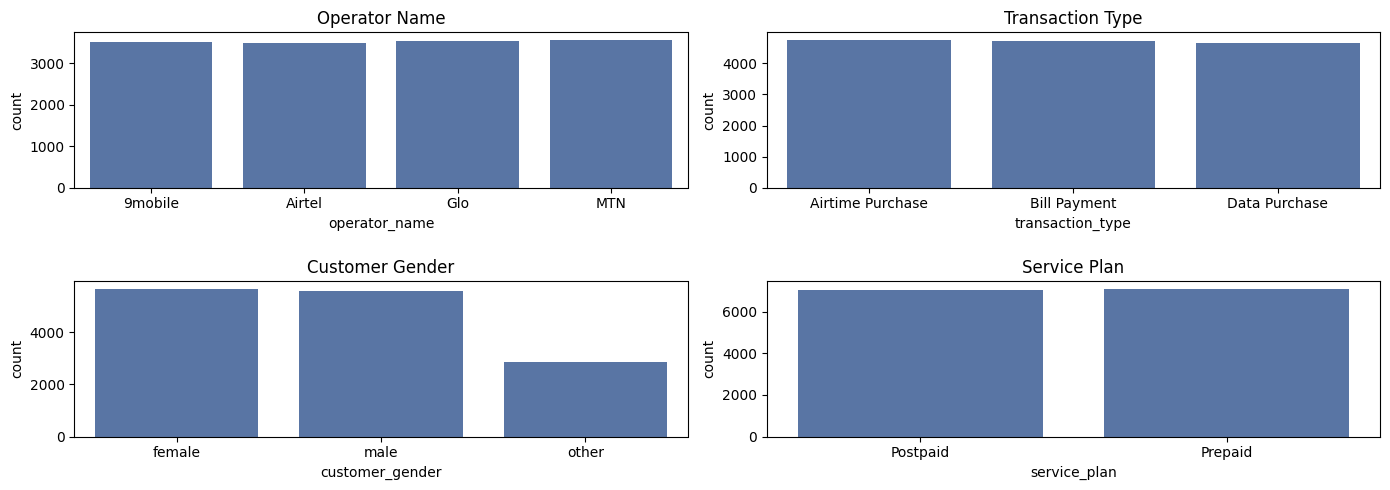

In [11]:

fig, axs = plt.subplots(nrows=2, ncols=2)
sns.countplot(x='operator_name', data=df, ax=axs[0][0])
sns.countplot(x='transaction_type', data=df, ax=axs[0][1])

sns.countplot(x='customer_gender', data=df, ax=axs[1][0])
sns.countplot(x='service_plan', data=df, ax=axs[1][1])

axs[0,0].set(title='Operator Name')
axs[0,1].set(title='Transaction Type')

axs[1,0].set(title='Customer Gender')
axs[1,1].set(title='Service Plan')

fig.tight_layout(h_pad=2)


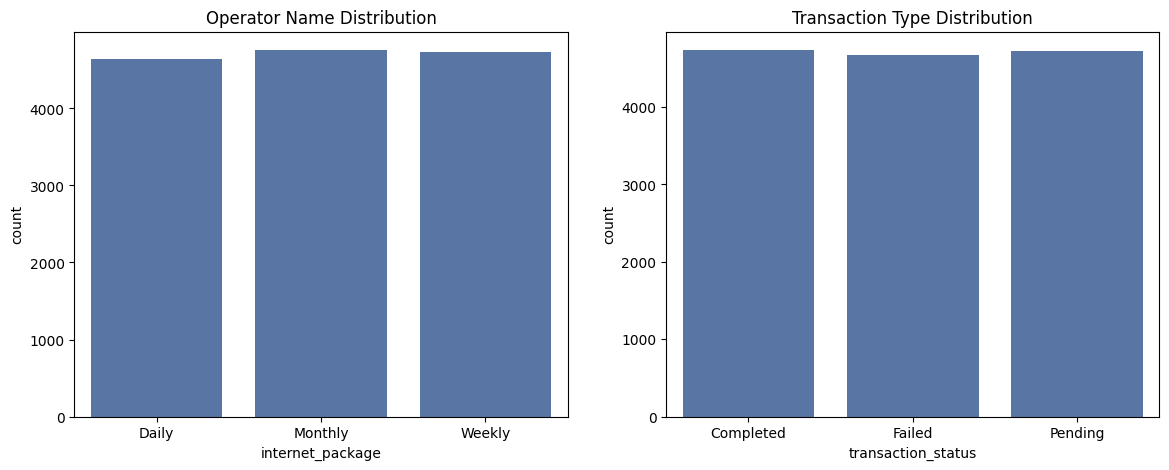

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
sns.countplot(x='internet_package', data=df, ax=ax1)
sns.countplot(x='transaction_status', data=df, ax=ax2)

ax1.set(title='Operator Name Distribution')
ax2.set(title='Transaction Type Distribution');


It seems all the categories above are evenly distributed.

### Getting the distribution of the continuous features

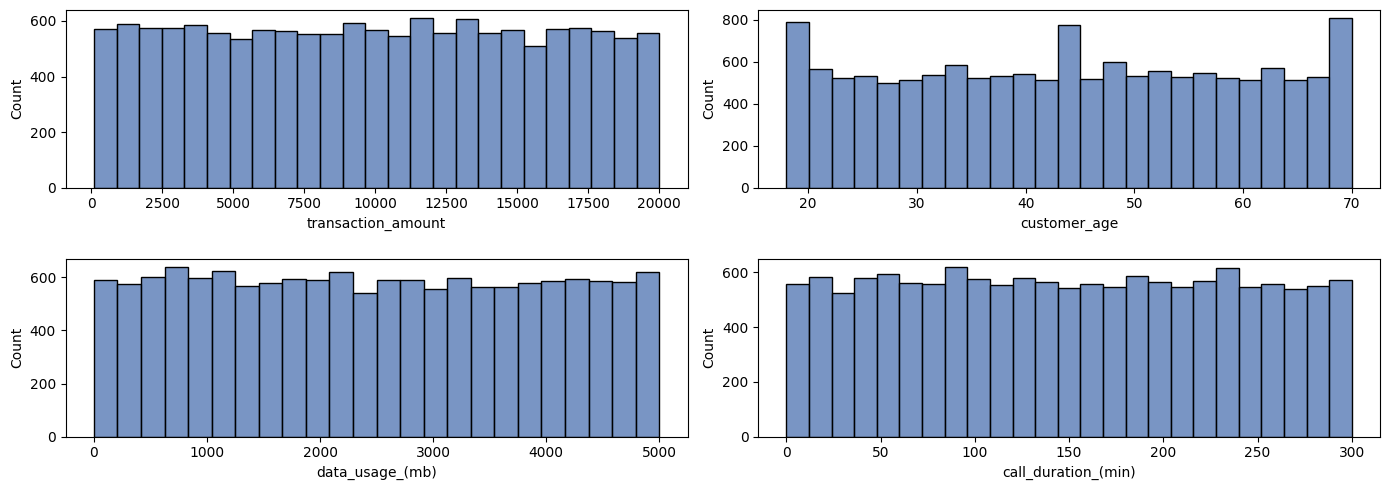

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='transaction_amount', data=df, ax=axs[0][0])
sns.histplot(x='customer_age', data=df, ax=axs[0][1])

sns.histplot(x='data_usage_(mb)', data=df, ax=axs[1][0])
sns.histplot(x='call_duration_(min)', data=df, ax=axs[1][1])

fig.tight_layout(h_pad=2)

Again the distributions seem to be evenly accross the observations

#### Let see if there are any correlations between the features

In [23]:
df.columns

Index(['transaction_date', 'operator_name', 'transaction_type',
       'transaction_amount', 'customer_age', 'customer_gender',
       'customer_location', 'service_plan', 'data_usage_(mb)',
       'call_duration_(min)', 'sms_sent', 'internet_package',
       'transaction_status'],
      dtype='object')

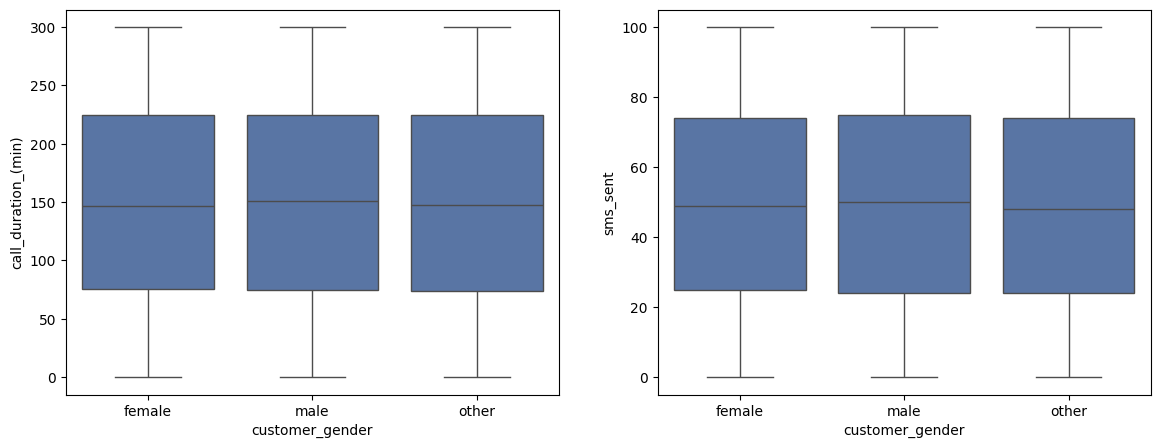

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(data=df, x="customer_gender", y="call_duration_(min)", ax=ax1)
sns.boxplot(data=df, x="customer_gender", y="sms_sent", ax=ax2);

Just like previous figures, the plots above also do not seem to have much variability

**Conclusion: The way the dataset was generated does not lend itselt to much variability, hence it is not suited for analytic and predictive endevours. This project will stop at the cleaning phase**